In [1]:
import numpy as np
from utils import image_process, camera_calibration, controller
from matplotlib import pyplot as plt
import cv2
import os
import urx

In [2]:
from pypylon import pylon

In [3]:
# # 创建一个相机对象
# camera = pylon.InstantCamera(pylon.TlFactory.GetInstance().CreateFirstDevice())

# # 打开相机
# camera.Open()

# # 设置相机参数，例如曝光时间
# camera.ExposureTime.SetValue(20000)

# # 开始采集
# camera.StartGrabbing()

# # 创建一个图像处理器
# converter = pylon.ImageFormatConverter()

# # 设置图像处理参数
# converter.OutputPixelFormat = pylon.PixelType_Mono8
# converter.OutputBitAlignment = pylon.OutputBitAlignment_MsbAligned

# # 循环获取图像
# while camera.IsGrabbing():
#     grabResult = camera.RetrieveResult(5000, pylon.TimeoutHandling_ThrowException)

#     if grabResult.GrabSucceeded():
#         # 转换图像格式
#         image = converter.Convert(grabResult)
#         img = image.GetArray()
#         # 这里可以对图像进行处理，例如保存为文件
#         cv2.imwrite('image.png', img)

# # 停止采集
# camera.StopGrabbing()

# # 关闭相机
# camera.Close()

In [4]:
w = 240
h = 170
img_processor = image_process.ImageProcessor(240, 170)
images = img_processor.load_images("src/")


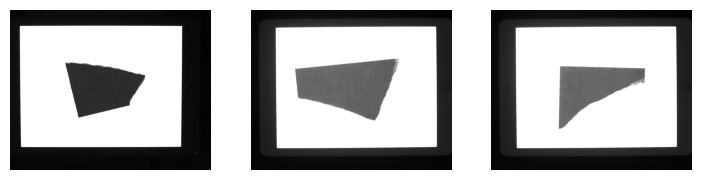

In [5]:
img_processor.display_images(images)

In [6]:
calibration_images = img_processor.load_images("calibration/")
# img_processor.display_images(calibration_images)

In [7]:
mtx, dist, newcameramtx = camera_calibration.calibrator(27)

In [8]:
# x,y,cam = camera_calibration.para_stu(len(kalibrierung_files))
mtx

array([[3.08572425e+03, 0.00000000e+00, 6.21399833e+02],
       [0.00000000e+00, 3.08667037e+03, 5.25161929e+02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

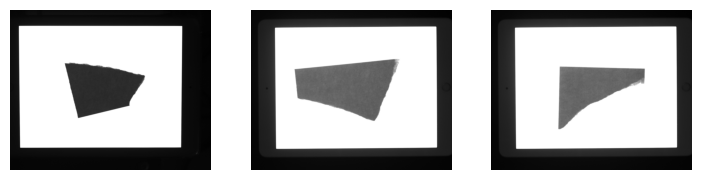

In [9]:
corrected_images = camera_calibration.correct_distortion(images, mtx, dist, newcameramtx)
img_processor.display_images(corrected_images)

In [18]:
scale = 4
images, contours, areas, appro_contours_list = img_processor.contour_for_robot(corrected_images, scale)


In [ ]:
img_processor.display_contour(images[1], contours[1], areas[1])

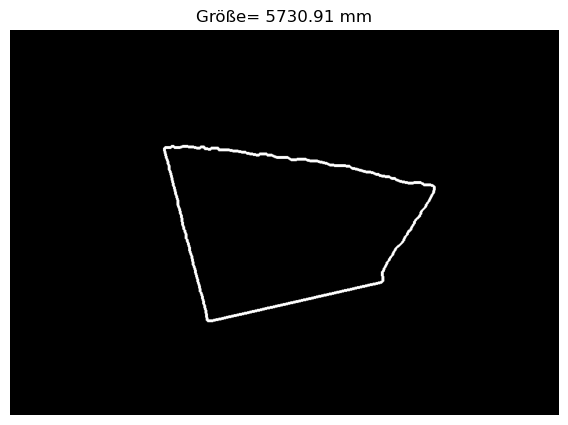

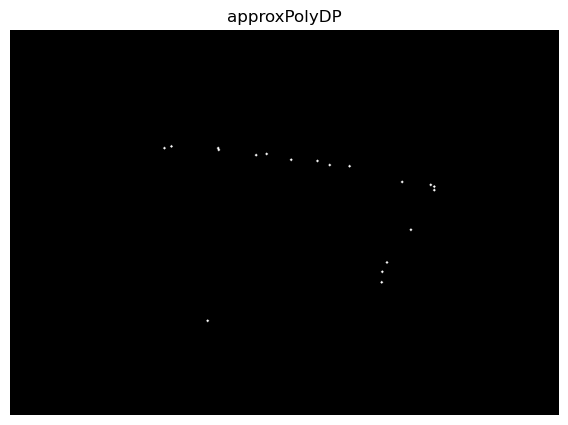

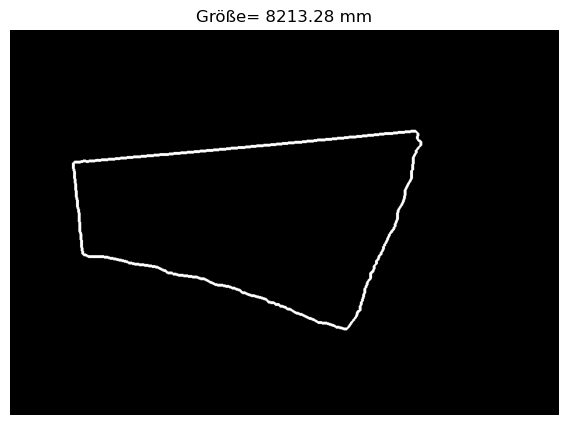

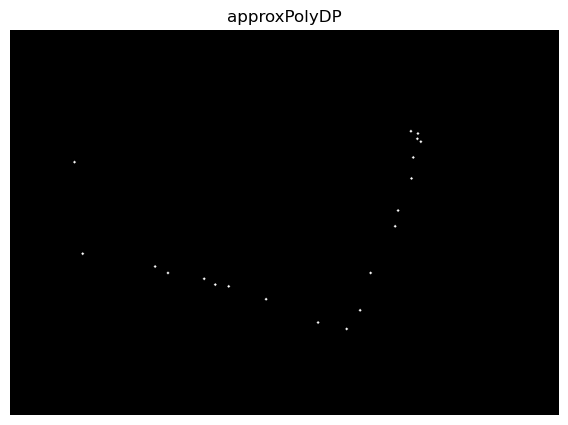

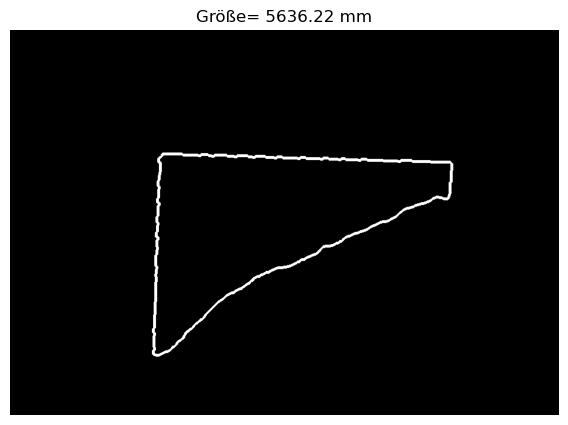

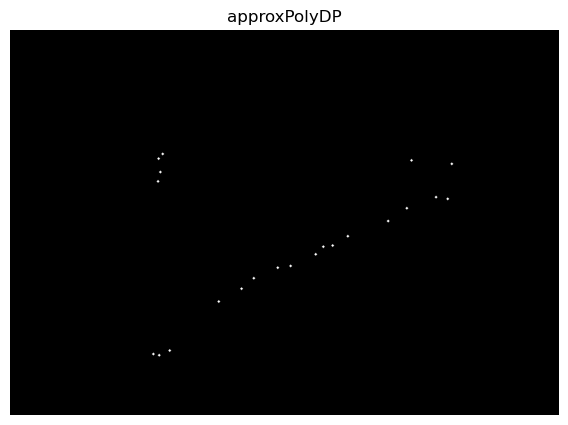

[[703 191]
 [690 218]
 [687 254]
 [664 309]
 [659 336]
 [617 416]
 [599 480]
 [576 512]
 [527 501]
 [438 461]
 [374 439]
 [351 436]
 [332 426]
 [270 416]
 [248 405]
 [124 383]
 [110 226]
 [686 173]
 [698 177]
 [697 186]]


In [16]:

contours = []
areas = []
appro_contours_list = []
c2_imgs = []
for i in range(len(corrected_images)):

    c_img = img_processor.preprocess(corrected_images[i])
    imgcon, cons, maxArea = img_processor.bounding_rect(c_img, filter)
    maxbox = cons[0][2]
    img_processor.reorder(maxbox)
    w_img = img_processor.warp_img(corrected_images[i], maxbox, w*scale, h*scale)
    
    w1_img = cv2.medianBlur(w_img,5)
    w2_img = cv2.bilateralFilter(w1_img, d = 50, sigmaColor= 10, sigmaSpace= 50)

    k2_img = img_processor.kmeans(w2_img, 3)

    c2_img = cv2.Canny(k2_img,100,110)
    kernel = np.ones((5,5))
    c2_img = cv2.dilate(c2_img,kernel,iterations=2) #dilatieren
    c2_img = cv2.erode(c2_img,kernel,iterations=1) #erodieren
    c2_imgs.append(c2_img)

    # display contours and aprroximate contours
    # contour
    contour, area = img_processor.find_internal_conturs(c2_img, 1000, scale) # arguments: image, threshold, scale
    contours.append(contour)
    areas.append(area)
    # fig=plt.figure(figsize=(10, 10))
    # fig.add_subplot(1, 2, 1)
    img_processor.display_contour(c2_img, contour, area)

    con2 = img_processor.approx_contour(contour)
    # aprroximate contour
    # fig.add_subplot(1, 2, 2)
    img_processor.display_approx_contour(c2_img, con2)
    plt.show()

    # final point contour
    appro_contours_list.append(con2)


con = appro_contours_list[1] # size 3 dimension [[[]]]
con = np.squeeze(con, axis=1) # size 2 dimension [[]]
print(con)
con = [ele/scale/1000 for ele in con] # mm to m, divid scale to origin image


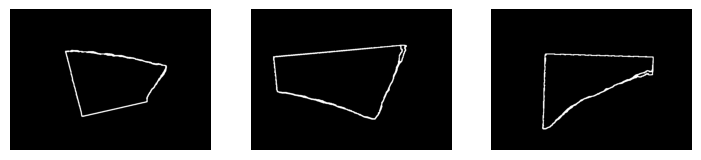

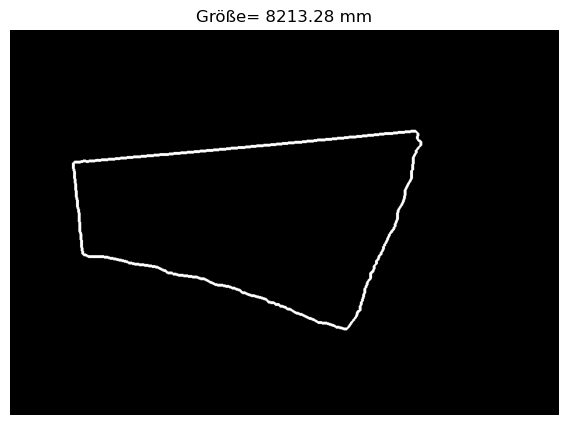

In [17]:
# fig = plt.figure(figsize=(1,1))
img_processor.display_images(images)

# img_processor.display_contour(images, con, areas[1])

img_processor.display_contour(c2_imgs[1], contours[1], areas[1])
# plt.imshow(contours[0], cmap="gray")
# plt.axis('off')

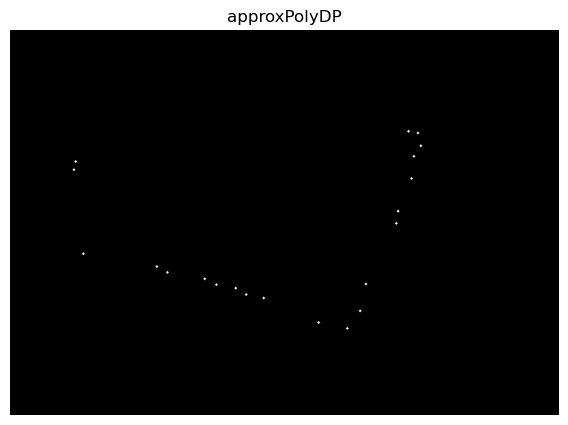

In [13]:
img_processor.display_approx_contour(images[1], appro_contours_list[1])

In [ ]:
robot_controller = controller.RobotController(0,0,0.08)
robot_controller.initialize(2) # payload 2

SyntaxError: invalid syntax (1866328842.py, line 2)

In [ ]:
robot_controller.start_pos() # Default position

NameError: name 'robot_controller' is not defined

In [ ]:
path = robot_controller.transformation(con)
robot_controller.move_to(path)